# Name: Akshay Nivrutti Vanjare
## Gmail: https://www.akshayvanjare8@gmail.com 
## LinkedIn: https://www.linkedin.com/in/akshayvanjare
## GitHub: https://www.github.com/akshayvanjare8

# Task-1 Prediction Using Supervised ML

### Importing Needed Packages

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

### Downloading the Data

In [54]:
!wget -O  students_score.csv https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv

--2020-10-02 06:52:10--  https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.128.133, 151.101.0.133, 151.101.64.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.128.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 212 [text/plain]
Saving to: ‘students_score.csv’

students_score.csv  100%[===================>]     212  --.-KB/s    in 0s      

2020-10-02 06:52:10 (6.87 MB/s) - ‘students_score.csv’ saved [212/212]



In [55]:
df = pd.read_csv("students_score.csv")

In [56]:
#Take a look at dataset

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Data Exploration

In [57]:
#Summarize the data

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


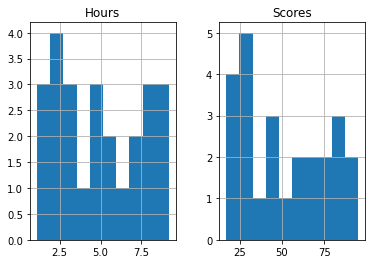

In [58]:
#We can plot each of these features

viz = df[['Hours','Scores']]
viz.hist()
plt.show()

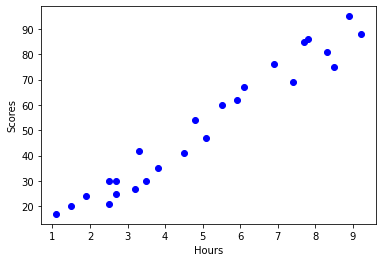

In [59]:
plt.scatter(df.Hours, df.Scores, color='blue')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [60]:
#Creating train and test dataset

msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

### Simple Regression Model

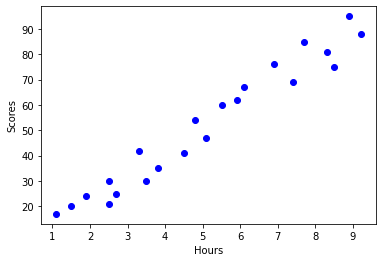

In [61]:
#Train data distribution

plt.scatter(train.Hours, train.Scores, color='blue')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

### Modeling

In [62]:
#Using sklearn package to model data

from sklearn import linear_model

regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['Hours']])
train_y = np.asanyarray(train[['Scores']])

regr.fit(train_x, train_y)

#The coefficients
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[9.55738425]]
Intercept:  [3.51799624]


### Plot Output

Text(0, 0.5, 'Scores')

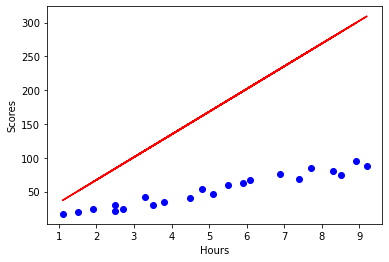

In [63]:
#We can plot the fit line over the data

plt.scatter(train.Hours, train.Scores, color='blue')
plt.plot(train_x, regr.coef_[0][0] * train_x * regr.intercept_[0], '-r')
plt.xlabel("Hours")
plt.ylabel("Scores")


In [64]:
# Predicting the result of 9.25 Hours/Day

y_pred = regr.intercept_ + regr.coef_ * 9.25

In [65]:
print("Predicted score if a student studies for 9 hrs/day is: ",y_pred)

Predicted score if a student studies for 9 hrs/day is:  [[91.92380058]]


# **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [66]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [67]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)

print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


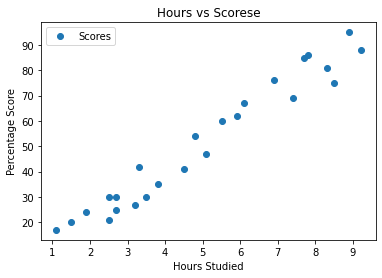

In [68]:
# Plotting the distribution of scores

s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Scorese')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### Preparing the data

In [69]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

In [70]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

### Training algorithm

In [71]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


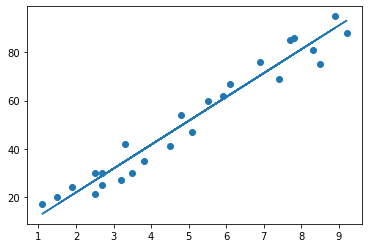

In [72]:
# Plotting the regression line

line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data

plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Making prediction

In [73]:
print(X_test) # Testing data - In Hours

y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [74]:
# Comparing Actual vs Predicted

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

### Evaluating model

In [75]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
